In [1]:
import tldextract

import numpy as np

from pymongo import MongoClient

from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tqdm

import json
import re

In [2]:
def get_links_set(db):
    links = set()

    for link_info in db.links.find():
        for l in link_info['links']:
            links.update(l.split('<br>'))

    return links    

In [3]:
def filter_dict(orig):
    return {k:val for k, val in orig.items() if 
            (type(val) is int and val > 1) or (type(val) is list and len(val) > 1)}

In [4]:
rels_map = {
    1 : 'single',
    2 : 'in a relationship',
    3 : 'engaged',
    4 : 'married',
    5 : 'its complicated',
    6 : 'actively searching',
    7 : 'in love'
}

In [5]:
client = MongoClient()
db = client.ir_project

In [6]:
db.users.count()

707961

In [6]:
rel_stats = defaultdict(lambda: defaultdict(int))

In [16]:
for i, u in enumerate(db.users.find({'sex':1})):
    if 'relation' in u:
        rel_stats[u['city']][u['relation']] += 1

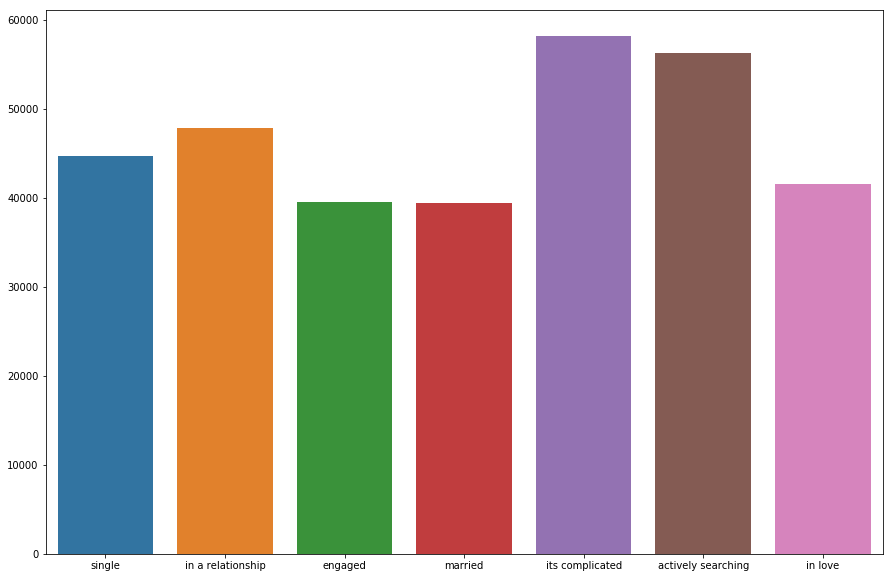

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(list(rels_map.values()), list(rel_stats[1].values()))

In [19]:
city_stats = defaultdict(int)
for i, u in enumerate(db.users.find()):
    city_stats[u['city']] += 1

In [20]:
city_stats = filter_dict(city_stats)

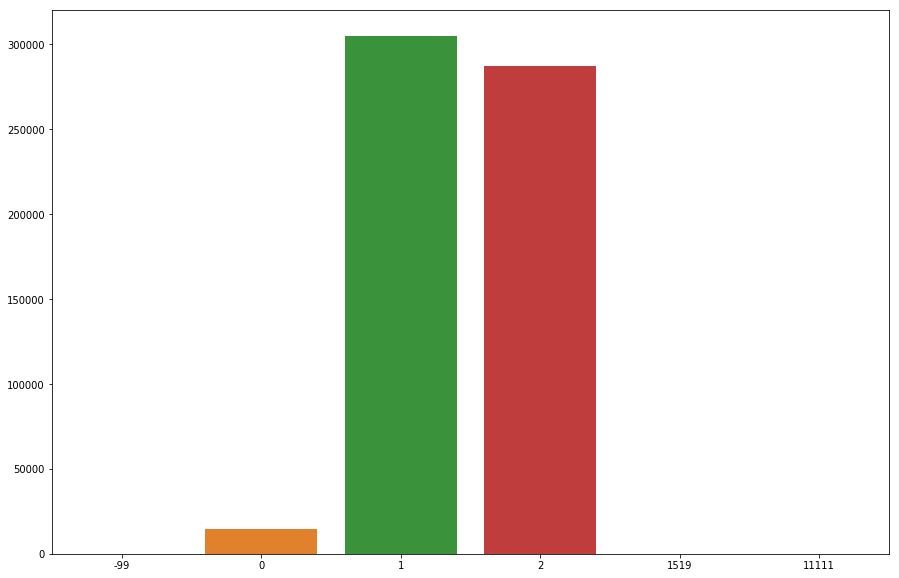

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(list(city_stats.keys()), list(city_stats.values()))

In [22]:
gender_stats = defaultdict(int)
for i, u in enumerate(db.users.find()):
    gender_stats[u['sex']] += 1

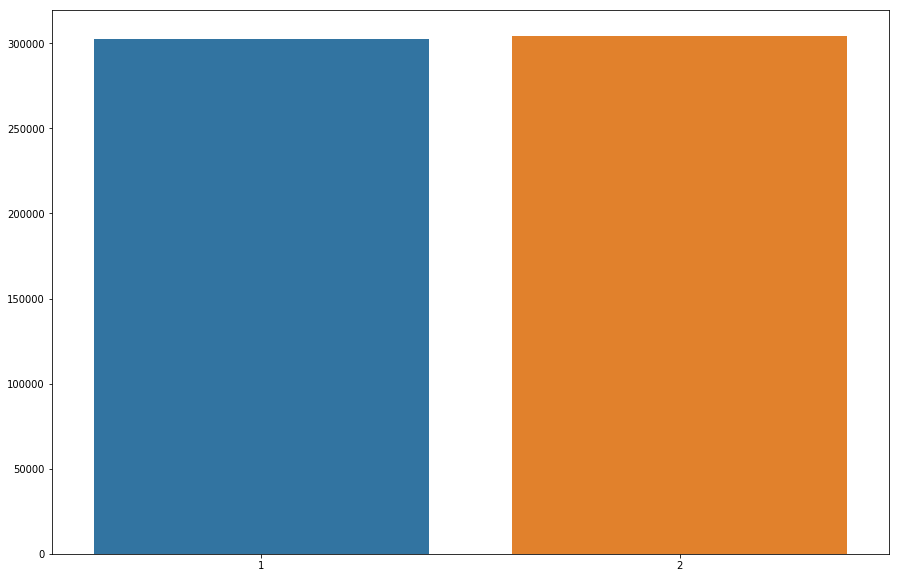

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(list(gender_stats.keys()), list(gender_stats.values()))

In [26]:
age_stats = defaultdict(int)
for i, u in enumerate(db.users.find({'sex':1})):
    age_stats[u['age']] += 1

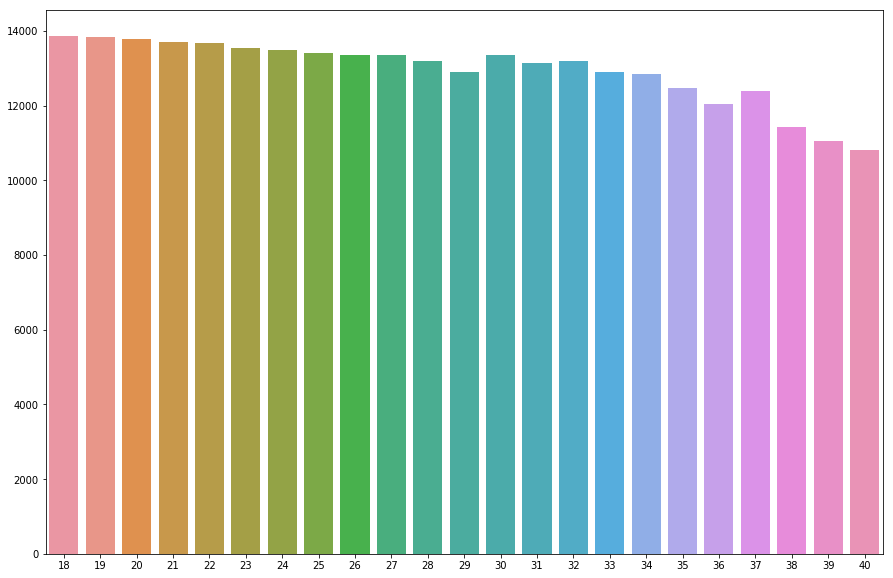

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(list(age_stats.keys()), list(age_stats.values()))

In [7]:
links_list = get_links_set(db)
print(len(links_list))

760676


In [8]:
domains = [tldextract.extract(url).domain for url in links_list]
d_counter = Counter(domains)

top_domains = d_counter.most_common()[:25]

In [5]:
russian_alphabet = set('йцукенгшщзхъэждлорпавыфячсмитьбюё')
def is_cyrillic_word(w):
    tmp = set(w) - russian_alphabet
    
    return len(tmp) == 0

In [6]:
freqs = json.load(open('doc_freqs.json'))

In [12]:
freqs_vals = np.array(list(freqs.values()))

In [17]:
threshold = np.arange(11)
percents = [sum(freqs_vals > t)/len(freqs_vals) for t in threshold]

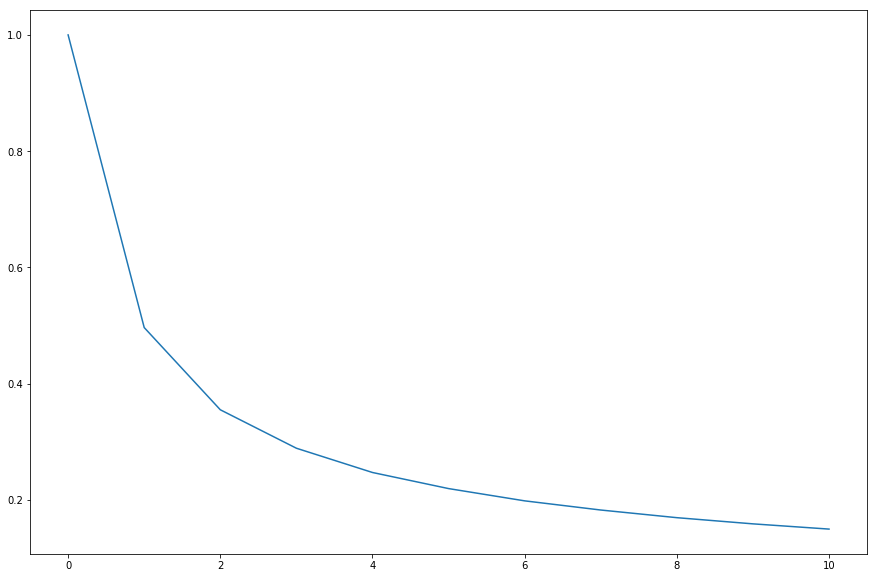

In [18]:
plt.figure(figsize=(15,10))
plt.plot(threshold, percents)

In [7]:
freqs_cyrillic = {w:f for w, f in freqs.items() if is_cyrillic_word(w)}

In [10]:
len(freqs_cyrillic)/len(freqs)

0.549732668258918

In [32]:
freqs_vals = np.array(list(freqs_cyrillic.values()))

In [33]:
threshold = np.arange(11)
percents = [sum(freqs_vals > t)/len(freqs_vals) for t in threshold]

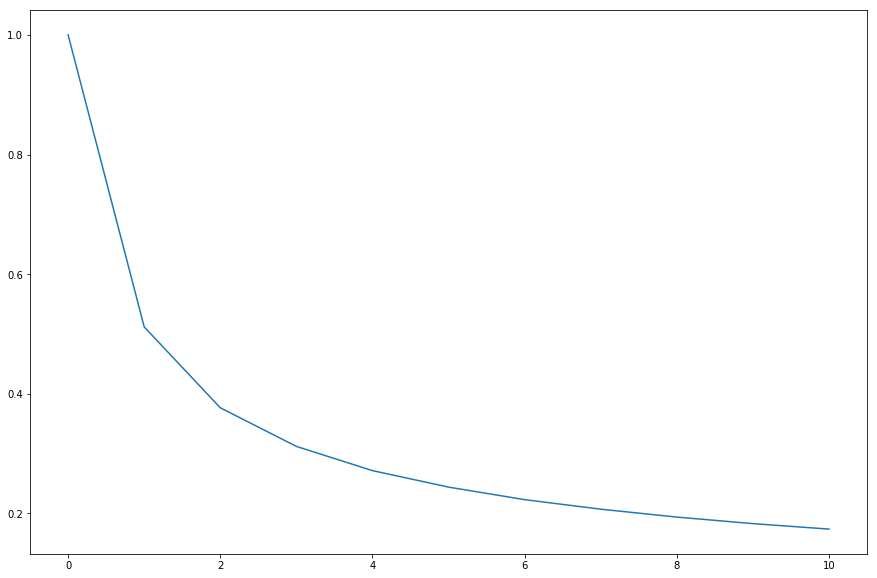

In [34]:
plt.figure(figsize=(15,10))
plt.plot(threshold, percents)

In [6]:
freqs_non_cyrillic = {w:f for w, f in freqs.items() if not is_cyrillic_word(w)}

In [37]:
freqs_sorted = sorted(freqs_cyrillic.items(), reverse=True, key= lambda p: p[1])

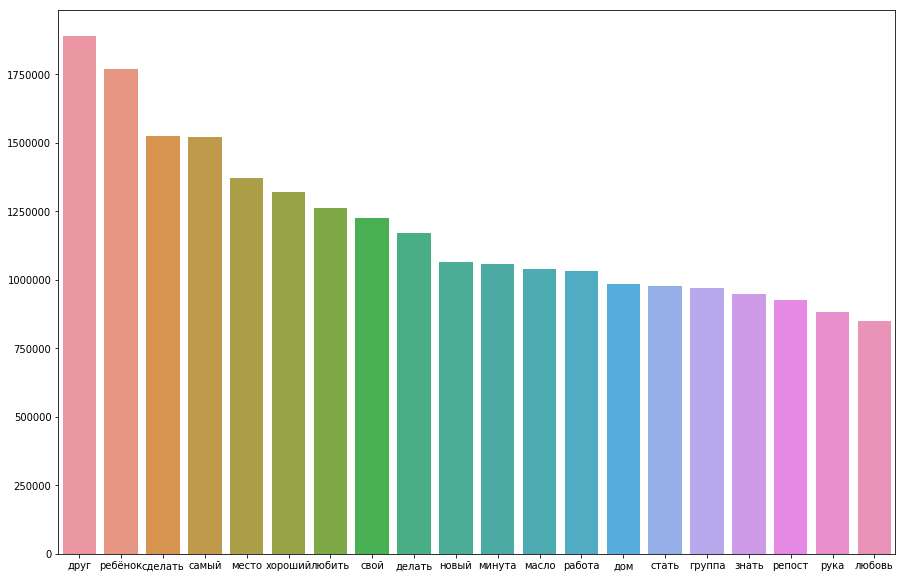

In [39]:
plt.figure(figsize=(15,10))
sns.barplot([f[0] for f in freqs_sorted[:20]], [f[1] for f in freqs_sorted[:20]])

In [11]:
non_cyr_sorted = sorted(freqs_non_cyrillic.items(), reverse=True, key= lambda p: p[1])

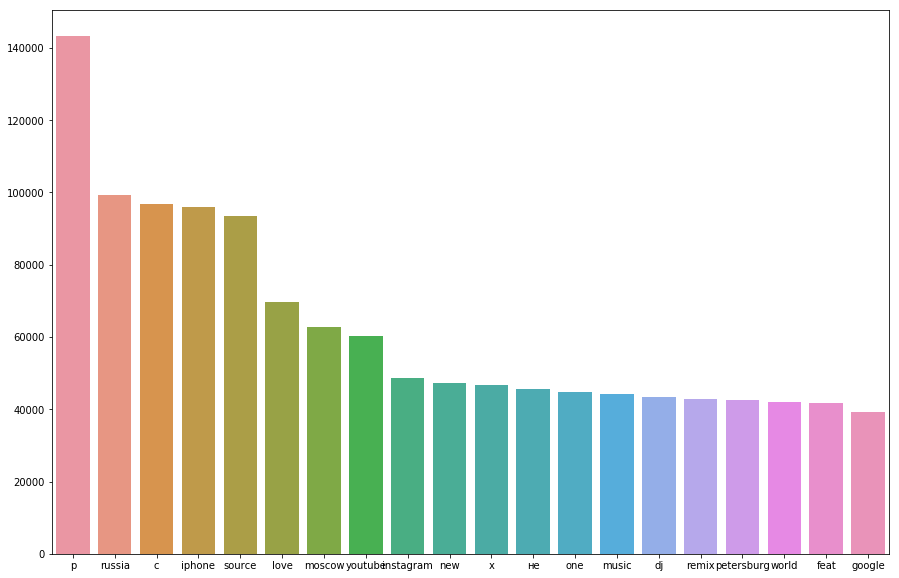

In [12]:
plt.figure(figsize=(15,10))
sns.barplot([f[0] for f in non_cyr_sorted[:20]], [f[1] for f in non_cyr_sorted[:20]])

In [11]:
from hunspell import Hunspell
import enchant

In [20]:
print(enchant.list_languages())

['en_US', 'ru_RU', 'en', 'en_CA', 'en_GB']


In [20]:
h = Hunspell('ru_RU-small')

In [21]:
# d = enchant.Dict('ru_RU')

In [22]:
fixed = defaultdict(int)
wtf = list()

In [23]:
for w, f in tqdm.tqdm_notebook(freqs_cyrillic.items()):
    suggestions = h.suggest(w) 
    if len(suggestions):
        w_f = suggestions[0]
        fixed[w_f] += f
    else:
        wtf.append(w)

HBox(children=(IntProgress(value=0, max=1287801), HTML(value='')))

KeyboardInterrupt: 